In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139096 sha256=29d376a8312ec87c5ff358865118059917157b5bd0beccb00d3937d1b9d627f5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [ ]:
import pandas as pd #установка нужных библиотек
import yfinance as yf

# Загрузка данных о ценах на нефть
symbol = 'CL=F'  # Фьючерсы на нефть WTI
data = yf.download(symbol, start='2020-01-01', end='2025-02-22', interval='1d') #временной период

[*********************100%***********************]  1 of 1 completed


In [ ]:
# убеждаемся, что  есть только нужные столбцы без пропусков
data = data[['Close']]
data = data.dropna()

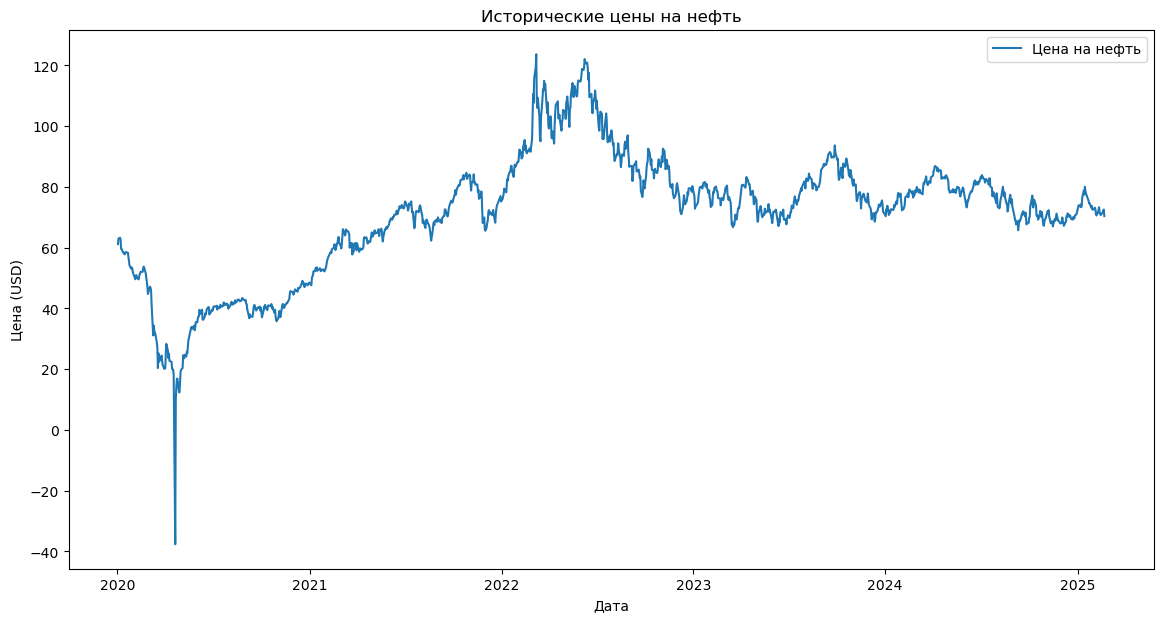

In [ ]:
import matplotlib.pyplot as plt #строим график

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Цена на нефть')
plt.title('Исторические цены на нефть')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

Mean Squared Error: 27.505245291452844


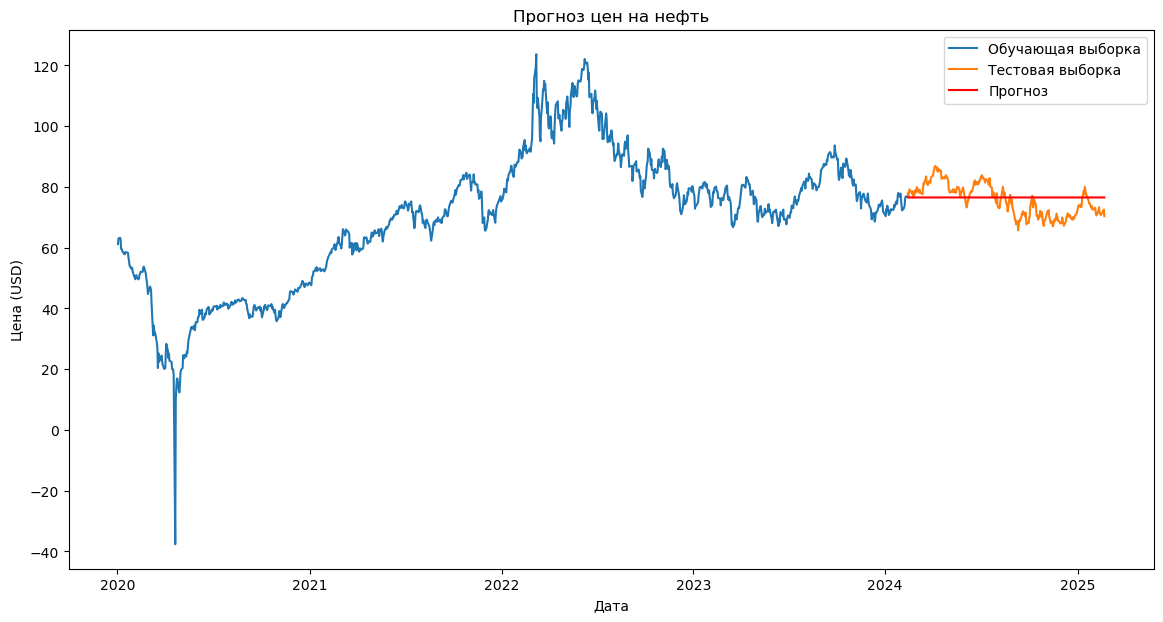

In [ ]:
from statsmodels.tsa.arima.model import ARIMA #строим прогноз через машинное обучение
from sklearn.metrics import mean_squared_error #метрика ошибки - средняя квадратичная

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Обучение модели ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Прогнозирование
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

# Визуализация прогноза
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Close'], label='Обучающая выборка')
plt.plot(test.index, test['Close'], label='Тестовая выборка')
plt.plot(test.index, forecast, label='Прогноз', color='red')
plt.title('Прогноз цен на нефть')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

In [15]:
with open('analytical_note.txt', 'w') as f:
    f.write("Аналитическая записка по прогнозу цен на нефть\n")
    f.write("Дата: {}\n".format(pd.Timestamp.now().date()))
    f.write("Модель: ARIMA(5, 1, 0)\n")
    f.write("Среднеквадратичная ошибка: {}\n".format(mse))
    f.write("Прогноз на следующую неделю: {}\n".format(forecast[-7:].values))

In [17]:
import numpy as np

values = [76.54494603, 76.54494603, 76.54494603, 76.54494603, 76.54494603, 76.54494603, 76.54494603]
mean_value = np.mean(values)
print(mean_value)

76.54494603


In [18]:
29/8


3.625